In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array

from image_manipulation.layers.samplewise_center import SamplewiseCenter
from image_manipulation.layers.samplewise_std_normalization import SamplewiseStdNormalization
from functions.plotting import plot_images

In [2]:
data_dir = os.path.join(
    '..',
    '..',
    '..',
    'data2',
    'images_original_inception_resnet_v2_150x150_categorized_no_test')
image_paths = [
    os.path.join(data_dir, 'training', 'akiec', 'ISIC_0024468.jpg'),
    os.path.join(data_dir, 'training', 'akiec', 'ISIC_0024646.jpg'),
    os.path.join(data_dir, 'training', 'akiec', 'ISIC_0025957.jpg'),
    os.path.join(data_dir, 'training', 'bcc', 'ISIC_0024799.jpg'),
    os.path.join(data_dir, 'training', 'bcc', 'ISIC_0054055.jpg')]
images = np.array([img_to_array(load_img(img_path)) for img_path in image_paths])

In [3]:
centering = SamplewiseCenter()
normalization = SamplewiseStdNormalization()
model = tf.keras.Sequential([
   centering,
   normalization,
])
augmented_imgs = model(images)

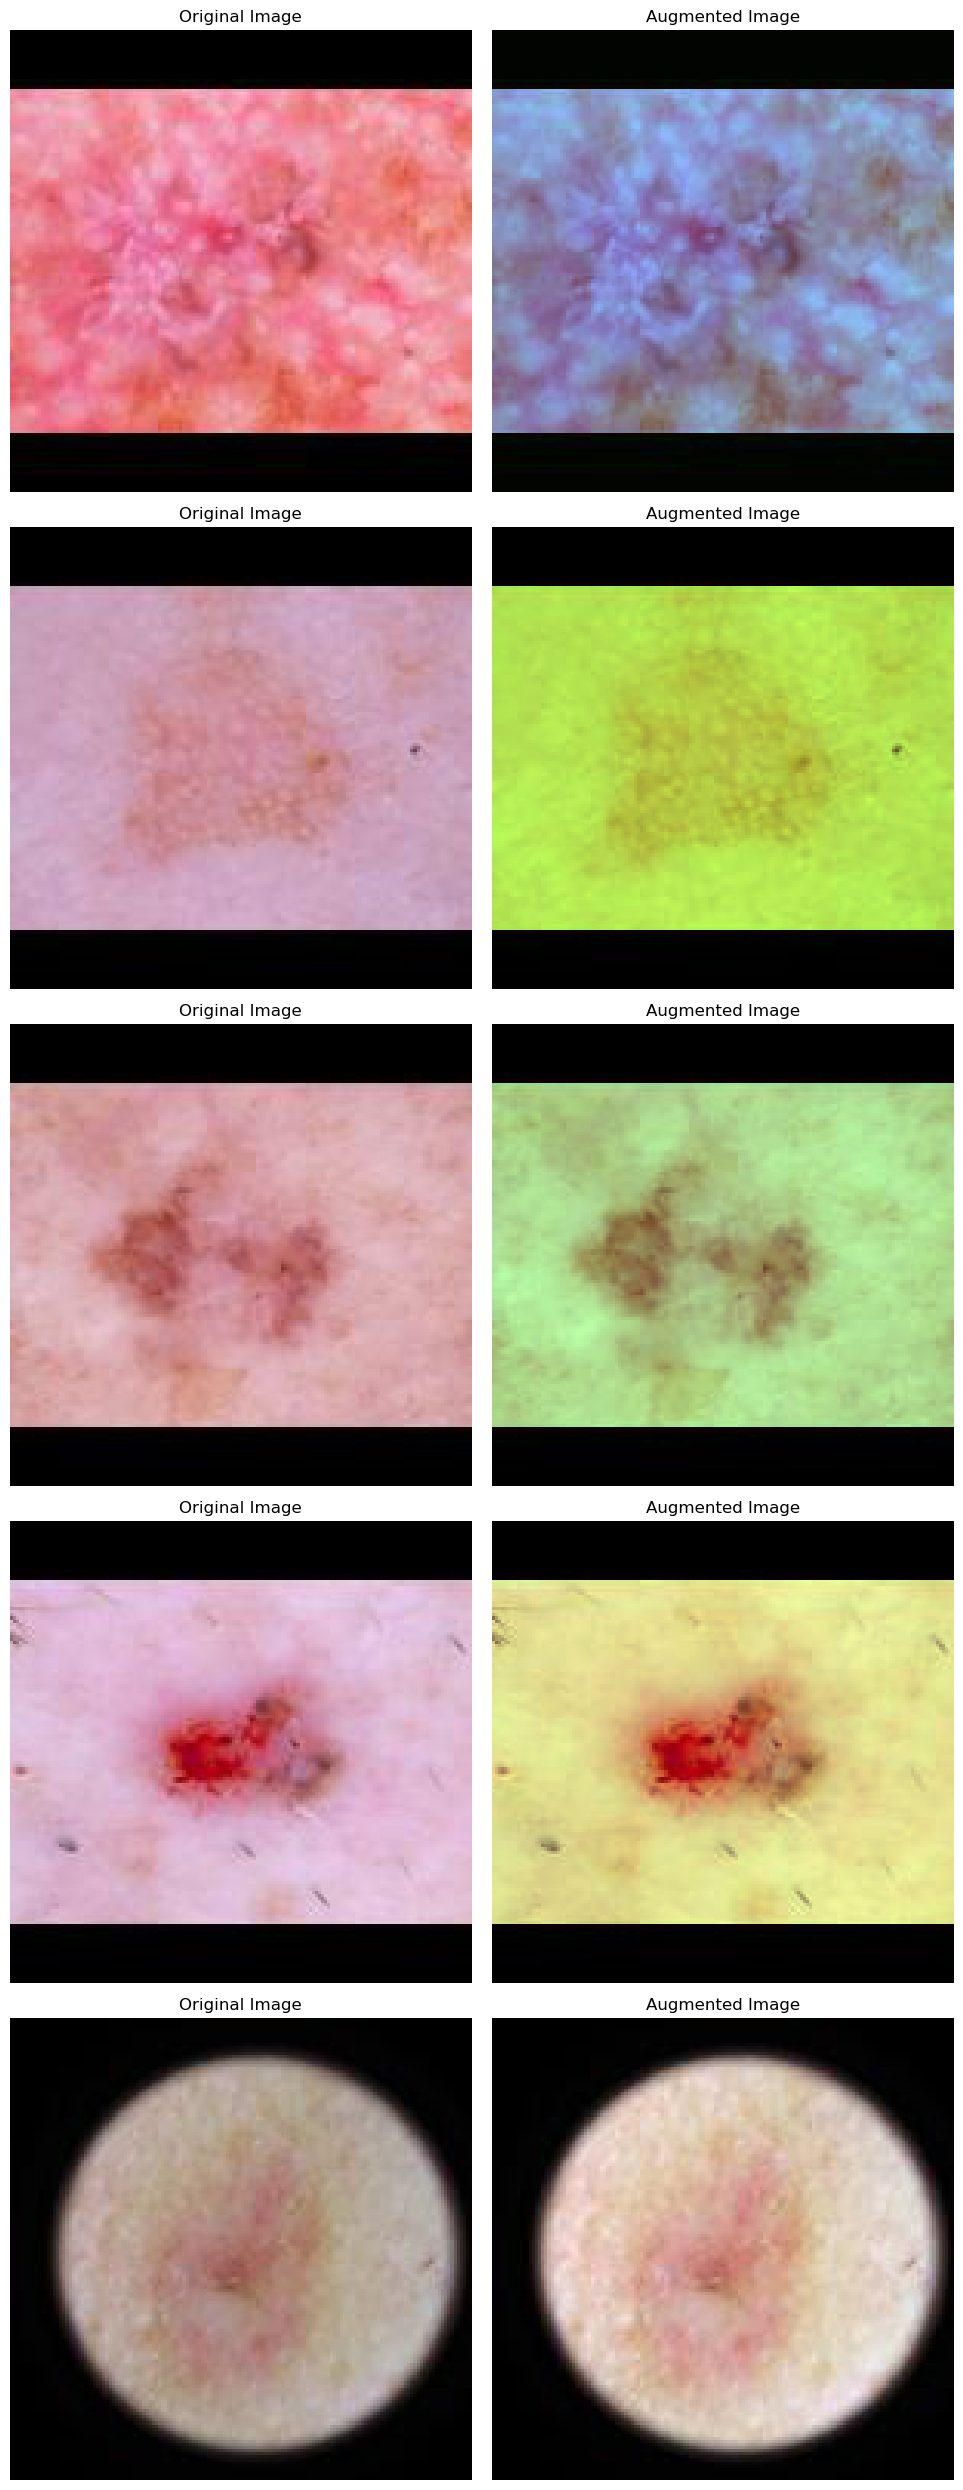

In [4]:
plot_images(images, augmented_imgs)